#Description : This is a python code for Cryptocurrency Analysis

In [27]:
# Import the libraries

import numpy as np
import pandas as pd

In [28]:
# Load the three data files that contain one year price data of Bitcoin, Ether and Litecoin.
from google.colab import files
uploaded=files.upload()

Saving BTC-USD.csv to BTC-USD (1).csv
Saving LTC-USD.csv to LTC-USD (1).csv
Saving ETH-USD.csv to ETH-USD (1).csv


In [29]:
#Store the data into dataframe variable

df_btc=pd.read_csv('BTC-USD.csv')
df_eth=pd.read_csv('ETH-USD.csv')
df_ltc=pd.read_csv('LTC-USD.csv')

In [30]:
# Print each dataset's last five rows
df_btc.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
362,2021-02-23,54204.929688,54204.929688,45290.589844,48824.425781,48824.425781,1.061025e+11
363,2021-02-24,48835.085938,51290.136719,47213.500000,49705.332031,49705.332031,6.369552e+10
364,2021-02-25,49709.082031,51948.968750,47093.851563,47093.851563,47093.851563,5.450657e+10
365,2021-02-26,47180.464844,48370.785156,44454.843750,46339.761719,46339.761719,3.509679e+11
366,2021-02-27,46581.812500,48203.937500,46287.441406,46872.132813,46872.132813,4.993014e+10


In [31]:
df_eth.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
362,2021-02-23,1781.409058,1781.409058,1378.840942,1570.203979,1570.203979,5.202986e+10
363,2021-02-24,1571.476440,1710.983765,1511.018921,1626.575684,1626.575684,3.132900e+10
364,2021-02-25,1625.393921,1670.224121,1465.058960,1475.703735,1475.703735,2.448168e+10
365,2021-02-26,1478.653320,1559.028931,1407.979248,1446.033691,1446.033691,3.143600e+10
366,2021-02-27,1465.815308,1524.351440,1443.611450,1470.579224,1470.579224,3.091205e+10


In [32]:
df_ltc.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
362,2021-02-23,208.123413,208.369675,159.684677,176.934921,176.934921,1.094470e+10
363,2021-02-24,176.966766,189.165466,169.789001,181.378494,181.378494,7.205360e+09
364,2021-02-25,181.385422,204.743835,176.032150,178.901840,178.901840,7.327999e+09
365,2021-02-26,179.128525,182.075851,163.248245,170.398148,170.398148,7.875998e+09
366,2021-02-27,176.988800,179.882904,169.932831,172.907578,172.907578,5.623843e+09


In [33]:
#Create a new dataframe having only closing prices of each Crypto coins
crypto_data=pd.DataFrame({'BTC':df_btc['Close'],'ETH':df_eth['Close'],'LTC':df_ltc['Close']})

In [34]:
#Show the new dataset
crypto_data.tail()

,BTC,ETH,LTC
362,48824.425781,1570.203979,176.934921
363,49705.332031,1626.575684,181.378494
364,47093.851563,1475.703735,178.901840
365,46339.761719,1446.033691,170.398148
366,46872.132813,1470.579224,172.907578


Now we have our data ready to analyse.

In [36]:
# Get the summary statistics on the data
crypto_data.describe()

,BTC,ETH,LTC
count,363.000000,363.000000,363.000000
mean,16094.127400,505.708916,72.703342
std,11709.960425,445.486318,45.701670
min,4970.788086,110.605873,30.930883
25%,9191.845703,226.756942,44.304507
50%,10923.627930,366.229004,50.611977
75%,18461.958985,564.122925,80.708874
max,57539.945313,1960.164795,236.973526


We are able to know the minimum, maximum, and quantile value for each coins in the past one year. So bitcoin seems extremely expensive than other ether and litecoin.

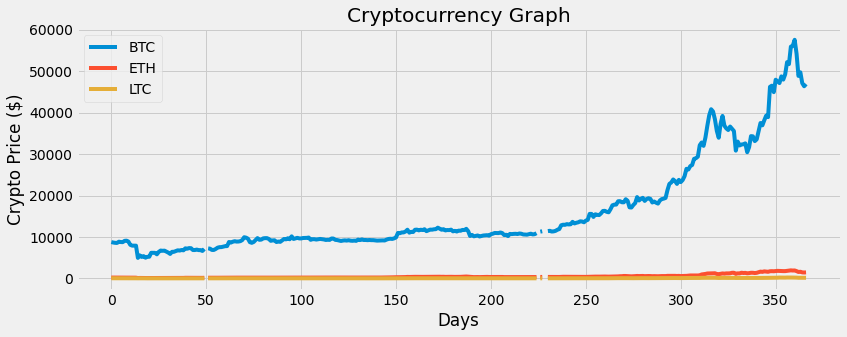

In [37]:
# Visualize the cryptocurrency closing price.

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12.2,4.5))

for c in crypto_data.columns.values:
  plt.plot(crypto_data[c], label=c)

plt.title('Cryptocurrency Graph')
plt.xlabel('Days')
plt.ylabel('Crypto Price ($)')
plt.legend(crypto_data.columns.values, loc='upper left')
plt.show()

#Data Preprocessing

We can see that the price of Bitcoin is fluctuating really more than other two coins. The graph of other two is not that much visually clear. So we will next try to scale the data and see how it looks.

In [46]:
#To check whether there is any missing values from index 200:250
crypto_data[200:250]

,BTC,ETH,LTC
200,10680.837891,377.268860,49.090122
201,10796.951172,364.839203,48.390099
202,10974.905273,365.812286,47.933434
203,10948.990234,389.019226,48.877068
204,10944.585938,384.364532,48.462814
205,11094.346680,385.544373,48.676830
206,10938.271484,371.052826,47.100529
207,10462.259766,341.786072,43.390221
208,10538.459961,344.503174,44.545048
209,10225.864258,320.585541,43.042057


In [47]:
#Dropped the missing valued rows.
crypto_data.dropna(inplace=True)

In [48]:
#Scale the data with having values between 0 and 100

from sklearn import preprocessing
min_max_scaler=preprocessing.MinMaxScaler(feature_range=(0,100))
scaled=min_max_scaler.fit_transform(crypto_data)
scaled

array([[ 7.25464561,  6.27974122, 14.84013287],
       [ 7.04151862,  6.28012569, 13.99374158],
       [ 6.90275609,  5.90641567, 13.40129334],
       ...,
       [80.12885444, 73.80667065, 71.81569545],
       [78.69438244, 72.20250202, 67.68854397],
       [79.7070886 , 73.52960399, 68.90646176]])

Now we have the scaled data in the form of array. Let us convert it to a dataframe.

In [49]:
#Convert the scaled numpy array into a dataframe
df_scaled_data=pd.DataFrame(scaled, columns=crypto_data.columns)

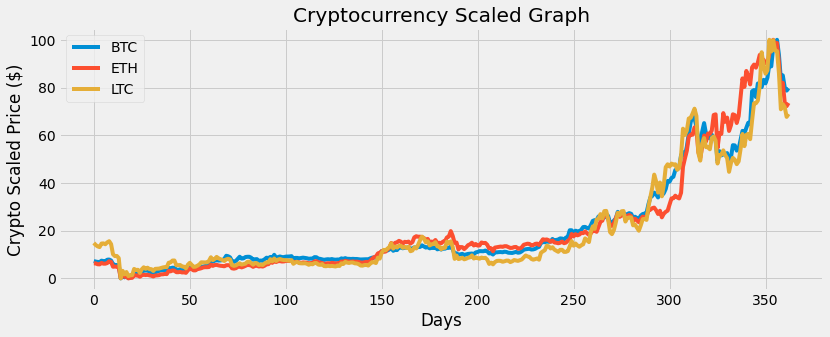

In [50]:
# Visualize the scaled cryptocurrency closing price.

plt.style.use('fivethirtyeight')
plt.figure(figsize=(12.2,4.5))

for c in df_scaled_data.columns.values:
  plt.plot(df_scaled_data[c], label=c)

plt.title('Cryptocurrency Scaled Graph')
plt.xlabel('Days')
plt.ylabel('Crypto Scaled Price ($)')
plt.legend(df_scaled_data.columns.values, loc='upper left')
plt.show()

This graph looks a lot better than the graph before. And we can see that, it looks like the price variation is going somehow in same direction most of the times. Might be they are having some high correlation.

In [51]:
#Get the daily simple return
DSR=crypto_data.pct_change(1)
DSR.head()

,BTC,ETH,LTC
0,NaN,NaN,NaN
1,-0.012754,0.000031,-0.028353
2,-0.008411,-0.030481,-0.020425
3,-0.004309,-0.003993,-0.010019
4,0.035879,0.052971,0.052433


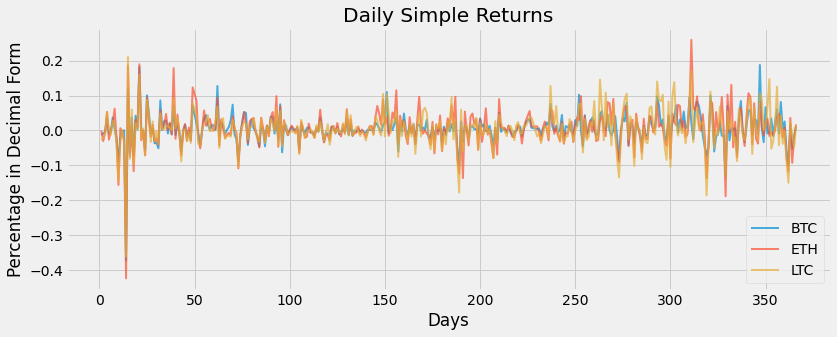

In [54]:
# Visualize the Daily Simple Returns

plt.style.use('fivethirtyeight')
plt.figure(figsize=(12.2,4.5))

for c in DSR.columns.values:
  plt.plot(DSR[c], label=c, lw=2, alpha=0.7)

plt.title('Daily Simple Returns')
plt.xlabel('Days')
plt.ylabel('Percentage in Decimal Form')
plt.legend(DSR.columns.values, loc='lower right')
plt.show()


We can see obvious spikes for Ether and Litecoin. Now let us take a look on the volatility of the three crypto currencies

In [55]:
# Get the volatility of cryptocurrency
print("Cryptocurrency Volatility:")
DSR.std()

Cryptocurrency Volatility:


BTC    0.042192
ETH    0.054433
LTC    0.054422
dtype: float64

The standard deviation of the three coin datas shows the volatility. More the standard deviation, more the volatility and risk. So this shows that from the last one year data, Ether is the riskiest. The chart also shows more fluctuation for Ether. Bitcoin is the least volatile. 

In [57]:
# Show the average daily simple returns.
DSR.mean()

BTC    0.005578
ETH    0.006745
LTC    0.004390
dtype: float64

This shows that Ether gives the higher daily simple return , and is more volatile or riskier compared to other two.

In [58]:
# Get the correlation matrix among the three, to know how much correlated the price fluctuations are.
DSR.corr()

,BTC,ETH,LTC
BTC,1.000000,0.796622,0.807193
ETH,0.796622,1.000000,0.825819
LTC,0.807193,0.825819,1.000000


We can see a high positive correlation between all three assets. Highest correlation is between Litecoin and Ether.

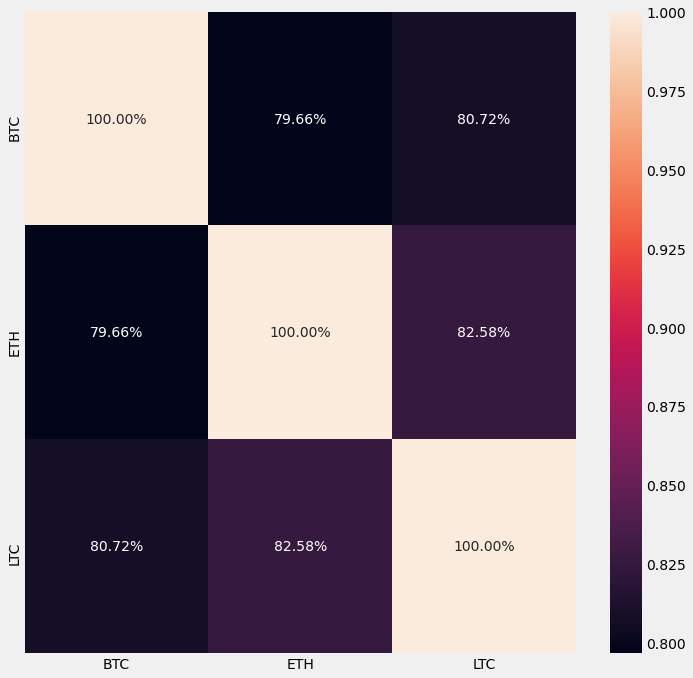

In [62]:
#Visualize the correlation

import seaborn as sns

plt.subplots(figsize=(11,11))
sns.heatmap(DSR.corr(), annot=True,fmt='.2%')


Now we can visually see the correlation. 
Now I am curious to know if I had invested a dollar an year before, how much would I have got or loss.

In [63]:
# Get the cumulative simple returns
DCSR=(DSR+1).cumprod()
DCSR

,BTC,ETH,LTC
0,NaN,NaN,NaN
1,0.987246,1.000031,0.971647
2,0.978942,0.969549,0.951801
3,0.974724,0.965677,0.942264
4,1.009696,1.016831,0.991670
...,...,...,...
362,5.558024,6.924721,2.876622
363,5.658303,7.173325,2.948866
364,5.361020,6.507968,2.908600
365,5.275177,6.377121,2.770346


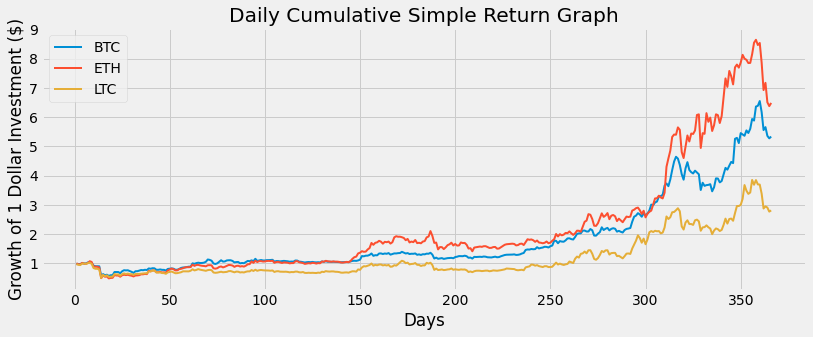

In [64]:
#Visualize Daily Cumulative Simple Returns
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12.2,4.5))

for c in DCSR.columns.values:
  plt.plot(DCSR[c], label=c,lw=2)

plt.title('Daily Cumulative Simple Return Graph')
plt.xlabel('Days')
plt.ylabel('Growth of 1 Dollar Investment ($)')
plt.legend(DCSR.columns.values, loc='upper left')
plt.show()

On the 100th day after the investment , we cannot see much change in any assets for that $1 investment. But after 365 days we can see that the Ether value has reached above 6 dollar (so a 100 dollar would become 600 dollar) which is more than the other.